In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

In [2]:
def function(x):
    return 10*np.sin(x) - np.sin(1/x) + 5*np.cos(2*x) + 1/2*np.sin(np.exp(x)) + x

In [3]:
x = np.linspace(-7,5,10000)
X, Y = x, function(x)

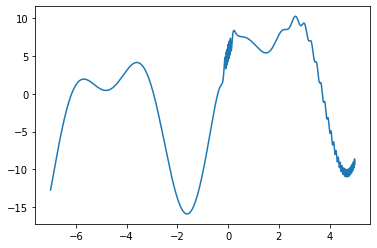

In [5]:
plt.plot(X, Y)

The following algorithm is supposed to iteratively find the minimum of a function. 

What problem does it have?

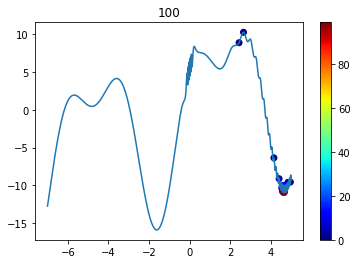

In [6]:
import matplotlib.cm as cm
x = X
index = np.random.randint(0, len(x)) # randomly select an index to sample a point
point = x[index] # sample a point to start
derivative_in_point = derivative(function, point)
it = 0 # current iteration
max_it = 100 # set the max number of iterations to avoid infinite loops
points = [] # list of the points we have inspected
threshold = 0.01 # instead for waiting till we reach the 0 of the derivative, put a threshold
while np.abs(derivative_in_point)> 0.01 and it<max_it: 
    if derivative_in_point < 0: # the slope is negative
        x = x[index:] # since the slope is negative, the local minimum should be on the right
        index = np.random.randint(0, len(x)) # randomly select an index
        point = x[index] # sample the next point in the new interval
        points.append(point) # store for later
        derivative_in_point = derivative(function, point) # compute the derivative in the new point
    else:
        x = x[0:index+1] # the slope is positive, so the minimum should be on the left
        index = np.random.randint(0, len(x))
        point = x[index]
        points.append(point)
        derivative_in_point = derivative(function, point)
    it +=1
plt.figure()
plt.plot(X,Y)
plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
plt.title(str(it))
plt.colorbar()


## Exercise

1. Can you make the algorithm above to be implemented into a fuction `gradient_descent(function, X, max_it)`?

2. Run the experiment multiple times: do you notice any important difference at each iteration?

## Integral

Scipy library also offers the possibility to compute the integral of a function.

In addition, the method `plt.fill_between(section, function(section)` colors the area under the curve of a generic function. 

Search the documentation of both and compute the area under the curve of the functions in the given intervals of the following exercises and plot them.



In [25]:
import matplotlib.cm as cm

def gradient_descent(function, x, max_it, threshold):
    """This function computes the gration descent of a given function

    Args:
        function (func): The function whose gradient descent will be computed
        x (float): The interval of evaluation
        max_it (int): The maximum number of iteration
        threshold (float): minimum allowed error

    Returns:
        (list,int): A tuple containing a list of evaluated points in the x-axis and the number of iterations
    """

    index = np.random.randint(0, len(x))
    point = x[index]
    derivative_in_point = derivative(function, point)

    it = 0 
    points = []
    
    while np.abs(derivative_in_point)> threshold and it<max_it:

        if derivative_in_point < 0:
            x = x[index:]
        else:
            x = x[0:index+1]
        
        index = np.random.randint(0, len(x))
        point = x[index]
        points.append(point)
        derivative_in_point = derivative(function, point)

        it +=1
        
    return points, it

def make_plot(X,Y,points,it):
    plt.figure()
    plt.plot(X,Y)
    plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
    plt.title(str(it))
    plt.colorbar()

def function(x):
    return 10*np.sin(x) - np.sin(1/x) + 5*np.cos(2*x) + 1/2*np.sin(np.exp(x)) + x


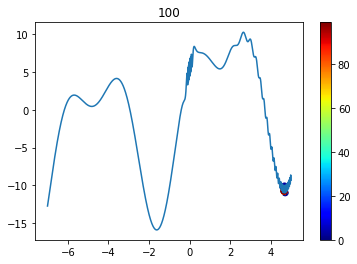

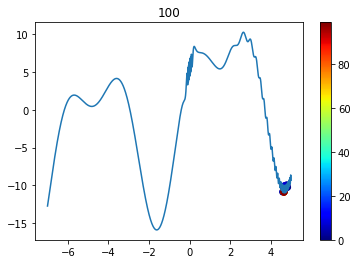

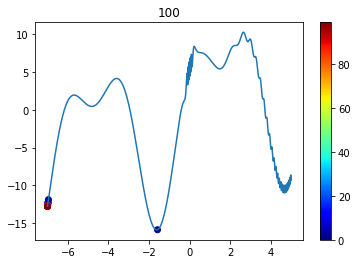

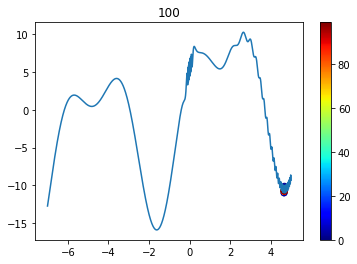

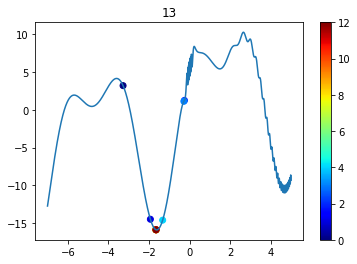

In [27]:
%matplotlib inline
max_it = 100
threshold = 0.01
x = np.linspace(-7,5,10000)
X, Y = x, function(x)

for i in range(100):
    points,it = gradient_descent(function, X, max_it, threshold)
    if i%20==0:
        make_plot(X,Y,points,it)



In [9]:
print("Different initializations results in different minimum points,\
 \nsome are stuck in local minimals while others found the global minimal")

Different initializations results in different minimum points, 
some are stuck in local minimals while others found the global minimal


### Example

interval = \[2,5\]

Function f(x) = x


In [10]:
from scipy import integrate
a, b = [2, 5]
def f(x):
    return x

result = integrate.quad(f, a, b)
result

(10.5, 1.1657341758564144e-13)

The return value is a tuple, with the first element holding the estimated value of the integral and the second element holding an upper bound on the error.

More in https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html .

In [11]:
area_under_the_curve = result[0]

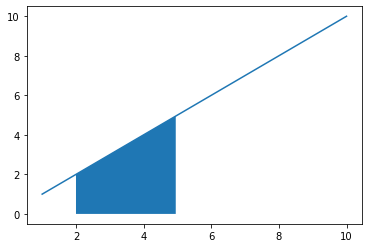

In [12]:
x = np.linspace(1,10, 100)
section = np.arange(2, 5, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))

1. interval = \[2,5\]

Function f(x) = 5

Compare the result computing the area by hand. Does it make sense?

Be careful: defining a constant function, you may end up with a single number instead of an array of the same size of the input. For this, I recommend to put in your function `constant_value*np.ones_like(x)`.

Area under the curve:  15.0


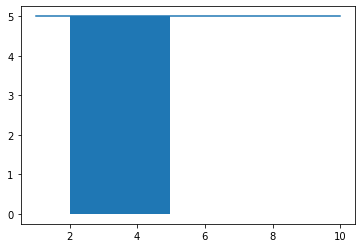

In [13]:
def f(x):
    return 5*np.ones_like(x)

a, b = [2, 5]
result = integrate.quad(f, a, b)
print("Area under the curve: ",result[0])

x = np.linspace(1,10, 100)
section = np.arange(a, b, (b-a)/100)
plt.plot(x, f(x))
plt.fill_between(section,f(section))

2. interval = \[-1,1\]

Function f(x) = 1/x

Area under the curve:  -1.4752082475860889e-16


Text(0.5, 1.0, 'With fill')

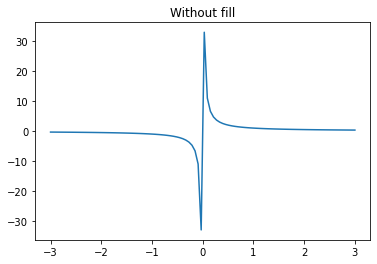

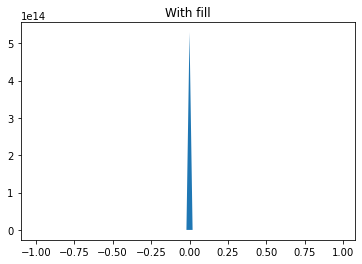

In [14]:
def f(x):
    return 1/(x+1e-15)

a, b = [-1, 1]
result = integrate.quad(f, a, b)
print("Area under the curve: ",result[0])

x = np.linspace(a-2,b+2, 100)
plt.plot(x, f(x))
plt.title("Without fill")

plt.figure()
section = np.arange(a, b, (b-a)/100)
plt.fill_between(section,f(section))
plt.title("With fill")

2. interval = \[-pi,pi\]

Function f(x) = sin(x)

Area under the curve:  0.0


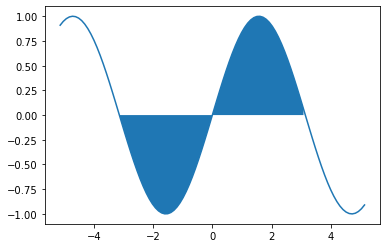

In [15]:
def f(x):
    return np.sin(x)

a, b = [-np.pi, np.pi]
result = integrate.quad(f, a, b)
print("Area under the curve: ",result[0])

x = np.linspace(a-2,b+2, 100)
plt.plot(x, f(x))

section = np.arange(a, b, (b-a)/100)
plt.fill_between(section,f(section))

3. interval = \[-pi,pi\]

Function f(x) = cos(x)


Area under the curve:  2.615901373506474e-16


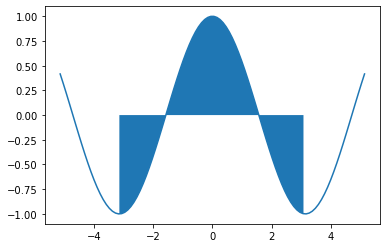

In [16]:
def f(x):
    return np.cos(x)

a, b = [-np.pi, np.pi]
result = integrate.quad(f, a, b)
print("Area under the curve: ",result[0])

x = np.linspace(a-2,b+2, 100)
plt.plot(x, f(x))

section = np.arange(a, b, (b-a)/100)
plt.fill_between(section,f(section))

2. interval = \[-pi,pi\]

Function f(x) = sin(x) - cos(2x)

Area under the curve:  5.231802747012948e-16


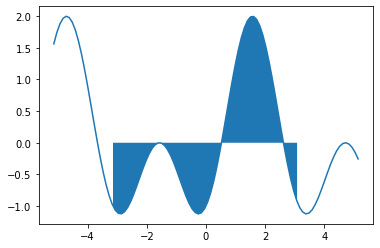

In [17]:
def f(x):
    return np.sin(x) - np.cos(2*x)

a, b = [-np.pi, np.pi]
result = integrate.quad(f, a, b)
print("Area under the curve: ",result[0])

x = np.linspace(a-2,b+2, 100)
plt.plot(x, f(x))

section = np.arange(a, b, (b-a)/100)
plt.fill_between(section,f(section))